In [2]:
!pip install tensorflow

     |████████████████████████████████| 394.8 MB 10.0 MB/s eta 0:00:01    |▉                               | 10.5 MB 10.3 MB/s eta 0:00:38     |█▏                              | 14.3 MB 10.3 MB/s eta 0:00:37     |██                              | 23.5 MB 7.8 MB/s eta 0:00:48     |████▋                           | 57.3 MB 10.8 MB/s eta 0:00:32     |████▊                           | 58.6 MB 17.8 MB/s eta 0:00:19     |█████                           | 60.9 MB 17.8 MB/s eta 0:00:19     |█████▎                          | 65.1 MB 1.6 MB/s eta 0:03:25     |█████▍                          | 66.0 MB 1.6 MB/s eta 0:03:24     |█████▍                          | 67.1 MB 1.8 MB/s eta 0:02:59     |█████████▍                      | 115.7 MB 5.4 MB/s eta 0:00:52     |█████████▋                      | 117.9 MB 1.3 MB/s eta 0:03:37     |█████████▋                      | 118.3 MB 1.3 MB/s eta 0:03:37     |██████████                      | 122.7 MB 8.2 MB/s eta 0:00:34     |██████████                      

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from keras.callbacks import EarlyStopping
from keras.layers.normalization import BatchNormalization

csv = './StudentsPerformance.csv'
df = pandas.read_csv(csv,low_memory=False)

df.head()

# data.corr().style.background_gradient(cmap="autumn_r")


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
data = df.dropna(how='any')

In [15]:
print(set(data.lunch))
print(set(data.race_ethnicity))
print(set(data.parental_level_of_education))
print(set(data.test_preparation_course))
print(set(data.math_score))
print(set(data.reading_score))
print(set(data.writing_score))
print(set(data.gender))

{'free/reduced', 'standard'}
{'group C', 'group A', 'group D', 'group E', 'group B'}
{"bachelor's degree", 'high school', 'some college', 'some high school', "associate's degree", "master's degree"}
{'none', 'completed'}
{0, 8, 18, 19, 22, 23, 24, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100}
{17, 23, 24, 26, 28, 29, 31, 32, 34, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100}
{10, 15, 19, 22, 23, 27, 28, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 

In [17]:
data['lunch'] = df['lunch'].map({'free/reduced': 0, 'standard': 1})
data['race_ethnicity'] = df['race_ethnicity'].map({'group C': 2, 'group A': 0, 'group D': 3, 'group E': 4, 'group B': 1})
data['parental_level_of_education'] = df['parental_level_of_education'].map({"bachelor's degree": 4, 'high school': 0, 'some college': 3, 'some high school': 1, "associate's degree": 2, "master's degree": 5})
data['gender'] = df['gender'].map({'male': 0, 'female': 1})
data['test_preparation_course'] = df['test_preparation_course'].map({'none': 0, 'completed': 1})

In [18]:
data.corr().style.background_gradient(cmap="autumn_r")

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
gender,1.000000,0.001502,0.051117,-0.021372,-0.006028,-0.167982,0.244313,0.301225
race_ethnicity,0.001502,1.000000,0.096556,0.046563,0.017508,0.216415,0.145253,0.165691
parental_level_of_education,0.051117,0.096556,1.000000,-0.019584,0.022081,0.163908,0.195413,0.247001
lunch,-0.021372,0.046563,-0.019584,1.000000,-0.017044,0.350877,0.229560,0.245769
test_preparation_course,-0.006028,0.017508,0.022081,-0.017044,1.000000,0.177702,0.241780,0.312946
math_score,-0.167982,0.216415,0.163908,0.350877,0.177702,1.000000,0.817580,0.802642
reading_score,0.244313,0.145253,0.195413,0.229560,0.241780,0.817580,1.000000,0.954598
writing_score,0.301225,0.165691,0.247001,0.245769,0.312946,0.802642,0.954598,1.000000


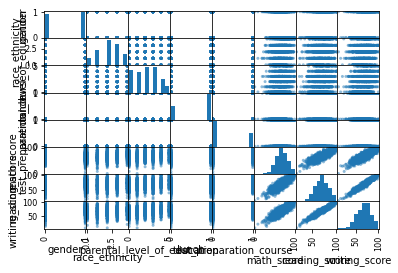

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(data)
plt.show()

In [ ]:
print(set(data.Sex))
print(set(data.Country))
print(set(data.Equipment))